In [1]:
%matplotlib inline
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
import psycopg2
import csv

#Leave these two lines at the top
conn = psycopg2.connect("postgresql://parsna01:@localhost/world")
cur = conn.cursor()

#put this in for loop
#fetchall or fetchone
cur.execute("select name from country")
res = cur.fetchall()
matrix = {}
supermatrix = {}
for row in res:
    matrix[row[0]] = 0
matrix['Czechoslovakia'] = 0
matrix['East Germany'] = 0
matrix['European Union'] = 0
matrix['Montenegro'] = 0
matrix['Romania'] = 0
matrix['South Sudan'] = 0
matrix['East Timor'] = 0
matrix['Democratic Yemen'] = 0
for row in res:
    matrix_copy = matrix.copy()
    supermatrix[row[0]] = matrix_copy
supermatrix['Czechoslovakia'] = matrix_copy
supermatrix['East Germany'] = matrix_copy
supermatrix['European Union'] = matrix_copy
supermatrix['Montenegro'] = matrix_copy
supermatrix['Romania'] = matrix_copy
supermatrix['South Sudan'] = matrix_copy
supermatrix['East Timor'] = matrix_copy
supermatrix['Democratic Yemen'] = matrix_copy

In [3]:
g = nx.Graph()
g.add_nodes_from(matrix)

In [4]:
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)
        
unknown_country = []  
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'] , 
    'DDR': ['East Germany', 'Europe', 'Western Europe'],
    'EU': ['European Union', 'Europe','Western Europe'],
    'MNE': ['Montenegro', 'Europe', 'Eastern Europe'], 
    'ROU': ['Romania', 'Europe','Eastern Europe'], 
    'SSD': ['South Sudan', 'Africa', 'Northern Africa'], 
    'TLS': ['East Timor','Asia','Southeast Asia'], 
    'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:   # skip the first row
    cur.execute("""select code, name, region, continent 
                   from country where code = %s""", [row[2]])
    country = cur.fetchone()

    if country:
        row.append(country[1])  # name
        row.append(country[2])  # region
        row.append(country[3])  # continent
        
    else:
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])  # name
        row.append(other_countries[row[2]][2])  # region
        row.append(other_countries[row[2]][1])  # continent
        
    text = row[3]
    name_speaker = row[4]
    for key in supermatrix:
        counter = text.count(key)
        supermatrix[name_speaker][key] += counter
        if counter > 20:
            g.add_edge(name_speaker, key, weight=counter)
            



for key in supermatrix:
    print(key + ' mentions...')
    for cntry in supermatrix[key]:
        print(cntry + ' ' + str(supermatrix[key][cntry]) + ' times')
    print()
    print()


Greece mentions...
Greece 577 times
Botswana 0 times
Peru 0 times
Mauritania 0 times
Brazil 1 times
Azerbaijan 1 times
Hungary 1 times
Djibouti 1 times
Cayman Islands 0 times
Guinea 1 times
Marshall Islands 1 times
Papua New Guinea 0 times
Gabon 0 times
Zimbabwe 7 times
Egypt 3 times
Martinique 0 times
Iraq 42 times
Taiwan 1 times
Malaysia 0 times
Germany 4 times
Lithuania 2 times
Saint Lucia 1 times
Sweden 2 times
Virgin Islands, British 0 times
Somalia 8 times
Niue 0 times
Palau 1 times
Senegal 0 times
Tunisia 1 times
Macao 0 times
Tajikistan 1 times
Poland 4 times
Guatemala 0 times
Ecuador 1 times
Grenada 1 times
Armenia 2 times
Cocos (Keeling) Islands 0 times
Zambia 0 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 1 times
French Guiana 0 times
Croatia 4 times
New Caledonia 0 times
Yemen 1 times
Uganda 0 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 0 times
Singapore 0 times
Yugoslavia 30 times
Greenland 0 ti

Yugoslavia 1 times
Greenland 0 times
Réunion 0 times
Netherlands 1 times
Tanzania 0 times
Indonesia 0 times
Sudan 0 times
Latvia 0 times
Bhutan 0 times
Portugal 0 times
Svalbard and Jan Mayen 0 times
El Salvador 0 times
Malta 0 times
Vanuatu 0 times
Liechtenstein 0 times
Norfolk Island 0 times
Algeria 0 times
Guadeloupe 0 times
Monaco 1 times
Nigeria 0 times
Lebanon 1 times
South Korea 0 times
Spain 1 times
Iceland 0 times
Saint Pierre and Miquelon 0 times
Thailand 0 times
Mayotte 0 times
Saint Helena 0 times
Bangladesh 0 times
Barbados 0 times
Comoros 0 times
Slovakia 0 times
Macedonia 1 times
Tokelau 0 times
Trinidad and Tobago 0 times
India 0 times
Syria 9 times
American Samoa 0 times
Haiti 0 times
Morocco 0 times
Seychelles 0 times
Czech Republic 1 times
Denmark 1 times
Bosnia and Herzegovina 1 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 0 times
United Kingdom 3 times
Mozambique 0 times
France 3 times
Italy 3 times
British Indian Ocean Territory 0 times
Guam 0 time

Kiribati 0 times
Rwanda 6 times
Tuvalu 1 times
Solomon Islands 0 times
Antarctica 0 times
Norway 1 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 1 times
Moldova 0 times
Canada 1 times
Laos 6 times
Congo 22 times
Lesotho 3 times
Niger 4 times
East Germany 0 times
Maldives 0 times
Bahrain 1 times
Qatar 3 times
South Georgia and the South Sandwich Islands 0 times
Dominica 0 times
Benin 1 times
Madagascar 1 times
Cyprus 22 times
Romania 0 times
South Africa 112 times
Wallis and Futuna 0 times
Montserrat 0 times
United Arab Emirates 0 times
European Union 2 times
Albania 0 times
Bahamas 1 times
Cameroon 0 times
United States 29 times
Saudi Arabia 2 times
Slovenia 0 times
Ireland 1 times
Holy See (Vatican City State) 0 times
Palestine 32 times
Belgium 0 times
Burundi 11 times
Switzerland 0 times
Colombia 2 times
Antigua and Barbuda 0 times
Libyan Arab Jamahiriya 1 times
Western Sahara 36 times
Côte dIvoire 0 times
Australia 0 times
Fiji Islands 0 times
South Sudan 3 times
Ma

Virgin Islands, U.S. 0 times
Cook Islands 0 times
Samoa 0 times
Brunei 0 times
Kenya 0 times
Tonga 0 times
Christmas Island 0 times


Belgium mentions...
Greece 1 times
Botswana 0 times
Peru 0 times
Mauritania 0 times
Brazil 3 times
Azerbaijan 0 times
Hungary 1 times
Djibouti 1 times
Cayman Islands 0 times
Guinea 9 times
Marshall Islands 0 times
Papua New Guinea 1 times
Gabon 0 times
Zimbabwe 5 times
Egypt 12 times
Martinique 0 times
Iraq 37 times
Taiwan 1 times
Malaysia 1 times
Germany 6 times
Lithuania 1 times
Saint Lucia 0 times
Sweden 1 times
Virgin Islands, British 0 times
Somalia 12 times
Niue 0 times
Palau 0 times
Senegal 1 times
Tunisia 3 times
Macao 0 times
Tajikistan 0 times
Poland 3 times
Guatemala 0 times
Ecuador 0 times
Grenada 1 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 0 times
French Polynesia 0 times
Andorra 1 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 1 times
New Caledonia 0 times
Yemen 1 times


Seychelles 0 times
Czech Republic 0 times
Denmark 0 times
Bosnia and Herzegovina 0 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 0 times
United Kingdom 0 times
Mozambique 0 times
France 1 times
Italy 2 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 0 times
Cambodia 1 times
Czechoslovakia 0 times
Uruguay 0 times
North Korea 0 times
Turkey 1 times
Anguilla 0 times
Pakistan 0 times
Aruba 0 times
Dominican Republic 0 times
Swaziland 0 times
Costa Rica 1 times
Austria 1 times
East Timor 2 times
Nicaragua 0 times
Myanmar 0 times
Ghana 0 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 0 times
Iran 0 times
Sierra Leone 0 times
Kiribati 4 times
Rwanda 1 times
Tuvalu 2 times
Solomon Islands 3 times
Antarctica 0 times
Norway 1 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 0 times
Moldova 0 times
Canada 0 times
Laos 0 times
Congo 0 times
Lesotho 0 times
Niger 0 times
East Ger

Yemen 0 times
Uganda 0 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 0 times
Singapore 0 times
Yugoslavia 4 times
Greenland 0 times
Réunion 0 times
Netherlands 1 times
Tanzania 0 times
Indonesia 0 times
Sudan 3 times
Latvia 12 times
Bhutan 0 times
Portugal 0 times
Svalbard and Jan Mayen 0 times
El Salvador 1 times
Malta 0 times
Vanuatu 0 times
Liechtenstein 0 times
Norfolk Island 0 times
Algeria 0 times
Guadeloupe 0 times
Monaco 0 times
Nigeria 0 times
Lebanon 1 times
South Korea 0 times
Spain 0 times
Iceland 1 times
Saint Pierre and Miquelon 0 times
Thailand 0 times
Mayotte 0 times
Saint Helena 0 times
Bangladesh 0 times
Barbados 0 times
Comoros 0 times
Slovakia 0 times
Macedonia 1 times
Tokelau 0 times
Trinidad and Tobago 0 times
India 2 times
Syria 3 times
American Samoa 0 times
Haiti 2 times
Morocco 0 times
Seychelles 0 times
Czech Republic 0 times
Denmark 2 times
Bosnia and Herzegovina 2 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 0 times
Unite

Burundi 1 times
Switzerland 1 times
Colombia 1 times
Antigua and Barbuda 1 times
Libyan Arab Jamahiriya 0 times
Western Sahara 0 times
Côte dIvoire 0 times
Australia 1 times
Fiji Islands 0 times
South Sudan 1 times
Mauritius 0 times
Micronesia, Federated States of 0 times
San Marino 1 times
Uzbekistan 0 times
Gambia 0 times
Honduras 0 times
Oman 0 times
Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 0 times
Afghanistan 8 times
Chile 0 times
Argentina 1 times
Philippines 0 times
Georgia 0 times
Liberia 2 times
Mali 0 times
Nauru 0 times
Kyrgyzstan 0 times
United States Minor Outlying Islands 0 times
Burkina Faso 1 times
Bulgaria 0 times
Central African Republic 0 times
Guinea-Bissau 0 times
Jamaica 0 times
Hong Kong 1 times
Saint Vincent and the Grenadines 0 times
Bermuda 0 times
Ethiopia 0 times
Kuwait 0 times
Gibraltar 0 times
China 0 times
New Zealand 0 times
Belarus 0 times
Equatorial Guinea 0 times
Cuba 0 times
Angola 1 times
P

Tunisia 0 times
Macao 0 times
Tajikistan 0 times
Poland 0 times
Guatemala 0 times
Ecuador 0 times
Grenada 1 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 1 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 0 times
New Caledonia 0 times
Yemen 6 times
Uganda 8 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 3 times
Singapore 0 times
Yugoslavia 1 times
Greenland 0 times
Réunion 0 times
Netherlands 1 times
Tanzania 2 times
Indonesia 1 times
Sudan 7 times
Latvia 0 times
Bhutan 1 times
Portugal 13 times
Svalbard and Jan Mayen 0 times
El Salvador 0 times
Malta 0 times
Vanuatu 1 times
Liechtenstein 1 times
Norfolk Island 0 times
Algeria 4 times
Guadeloupe 0 times
Monaco 0 times
Nigeria 2 times
Lebanon 14 times
South Korea 9 times
Spain 2 times
Iceland 0 times
Saint Pierre and Miquelon 0 times
Thailand 0 times
Mayotte 2 times
Saint Helena 0 times
Bangladesh 2 times
Barbados

Morocco 3 times
Seychelles 5 times
Czech Republic 0 times
Denmark 0 times
Bosnia and Herzegovina 2 times
Puerto Rico 2 times
Togo 0 times
Mongolia 0 times
Chad 40 times
United Kingdom 41 times
Mozambique 15 times
France 27 times
Italy 12 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 99 times
Cambodia 7 times
Czechoslovakia 0 times
Uruguay 0 times
North Korea 0 times
Turkey 4 times
Anguilla 0 times
Pakistan 9 times
Aruba 0 times
Dominican Republic 0 times
Swaziland 0 times
Costa Rica 0 times
Austria 0 times
East Timor 0 times
Nicaragua 18 times
Myanmar 2 times
Ghana 0 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 0 times
Iran 17 times
Sierra Leone 3 times
Kiribati 1 times
Rwanda 4 times
Tuvalu 1 times
Solomon Islands 1 times
Antarctica 0 times
Norway 1 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 1 times
Moldova 1 times
Canada 0 times
Laos 0 times
Congo 6 times
Lesotho 2 time

Honduras 0 times
Oman 1 times
Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 2 times
Afghanistan 27 times
Chile 4 times
Argentina 5 times
Philippines 8 times
Georgia 2 times
Liberia 1 times
Mali 2 times
Nauru 1 times
Kyrgyzstan 1 times
United States Minor Outlying Islands 0 times
Burkina Faso 0 times
Bulgaria 1 times
Central African Republic 0 times
Guinea-Bissau 5 times
Jamaica 1 times
Hong Kong 0 times
Saint Vincent and the Grenadines 2 times
Bermuda 0 times
Ethiopia 2 times
Kuwait 5 times
Gibraltar 0 times
China 35 times
New Zealand 0 times
Belarus 0 times
Equatorial Guinea 0 times
Cuba 4 times
Angola 13 times
Paraguay 0 times
Kazakstan 0 times
Russian Federation 2 times
Falkland Islands 0 times
Ukraine 2 times
Bouvet Island 0 times
Estonia 1 times
Japan 3 times
Cape Verde 2 times
Eritrea 3 times
French Southern territories 0 times
Israel 158 times
Bolivia 0 times
Belize 1 times
Finland 0 times
Montenegro 0 times
Jordan 2 times
S

Vanuatu 350 times
Liechtenstein 1 times
Norfolk Island 0 times
Algeria 1 times
Guadeloupe 0 times
Monaco 0 times
Nigeria 6 times
Lebanon 6 times
South Korea 1 times
Spain 1 times
Iceland 0 times
Saint Pierre and Miquelon 0 times
Thailand 2 times
Mayotte 1 times
Saint Helena 0 times
Bangladesh 3 times
Barbados 10 times
Comoros 0 times
Slovakia 0 times
Macedonia 0 times
Tokelau 0 times
Trinidad and Tobago 0 times
India 6 times
Syria 4 times
American Samoa 0 times
Haiti 10 times
Morocco 0 times
Seychelles 0 times
Czech Republic 0 times
Denmark 0 times
Bosnia and Herzegovina 1 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 1 times
United Kingdom 1 times
Mozambique 0 times
France 43 times
Italy 0 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 28 times
Cambodia 6 times
Czechoslovakia 0 times
Uruguay 2 times
North Korea 0 times
Turkey 2 times
Anguilla 0 times
Pakistan 1 times
Aruba 0 times
Dominican Republic 0 times
Swaziland 0 times
Costa Rica 

Bolivia 0 times
Belize 2 times
Finland 1 times
Montenegro 0 times
Jordan 0 times
Suriname 0 times
Mexico 3 times
Sao Tome and Principe 3 times
Virgin Islands, U.S. 0 times
Cook Islands 0 times
Samoa 0 times
Brunei 2 times
Kenya 3 times
Tonga 1 times
Christmas Island 0 times


Lebanon mentions...
Greece 0 times
Botswana 0 times
Peru 0 times
Mauritania 0 times
Brazil 1 times
Azerbaijan 0 times
Hungary 0 times
Djibouti 1 times
Cayman Islands 0 times
Guinea 1 times
Marshall Islands 0 times
Papua New Guinea 0 times
Gabon 1 times
Zimbabwe 1 times
Egypt 3 times
Martinique 0 times
Iraq 41 times
Taiwan 0 times
Malaysia 0 times
Germany 3 times
Lithuania 0 times
Saint Lucia 1 times
Sweden 1 times
Virgin Islands, British 0 times
Somalia 1 times
Niue 0 times
Palau 0 times
Senegal 0 times
Tunisia 0 times
Macao 0 times
Tajikistan 0 times
Poland 1 times
Guatemala 0 times
Ecuador 1 times
Grenada 1 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 0 times
French Polynesia 0 times
Andorra 0 ti

Guinea-Bissau 4 times
Jamaica 0 times
Hong Kong 0 times
Saint Vincent and the Grenadines 1 times
Bermuda 0 times
Ethiopia 1 times
Kuwait 2 times
Gibraltar 0 times
China 44 times
New Zealand 3 times
Belarus 0 times
Equatorial Guinea 0 times
Cuba 1 times
Angola 5 times
Paraguay 0 times
Kazakstan 0 times
Russian Federation 0 times
Falkland Islands 0 times
Ukraine 1 times
Bouvet Island 0 times
Estonia 1 times
Japan 9 times
Cape Verde 2 times
Eritrea 1 times
French Southern territories 0 times
Israel 50 times
Bolivia 0 times
Belize 1 times
Finland 0 times
Montenegro 1 times
Jordan 3 times
Suriname 0 times
Mexico 2 times
Sao Tome and Principe 1 times
Virgin Islands, U.S. 0 times
Cook Islands 0 times
Samoa 0 times
Brunei 5 times
Kenya 0 times
Tonga 1 times
Christmas Island 0 times


Mayotte mentions...
Greece 0 times
Botswana 0 times
Peru 0 times
Mauritania 0 times
Brazil 0 times
Azerbaijan 0 times
Hungary 0 times
Djibouti 0 times
Cayman Islands 0 times
Guinea 0 times
Marshall Islands 0 times

Finland 0 times
Montenegro 0 times
Jordan 0 times
Suriname 0 times
Mexico 0 times
Sao Tome and Principe 0 times
Virgin Islands, U.S. 0 times
Cook Islands 0 times
Samoa 0 times
Brunei 0 times
Kenya 0 times
Tonga 0 times
Christmas Island 0 times


Malawi mentions...
Greece 0 times
Botswana 1 times
Peru 0 times
Mauritania 1 times
Brazil 5 times
Azerbaijan 0 times
Hungary 0 times
Djibouti 3 times
Cayman Islands 0 times
Guinea 3 times
Marshall Islands 1 times
Papua New Guinea 0 times
Gabon 0 times
Zimbabwe 8 times
Egypt 5 times
Martinique 0 times
Iraq 8 times
Taiwan 37 times
Malaysia 1 times
Germany 6 times
Lithuania 1 times
Saint Lucia 1 times
Sweden 0 times
Virgin Islands, British 0 times
Somalia 15 times
Niue 0 times
Palau 0 times
Senegal 1 times
Tunisia 0 times
Macao 0 times
Tajikistan 0 times
Poland 0 times
Guatemala 1 times
Ecuador 0 times
Grenada 0 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 5 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald I

Swaziland 0 times
Costa Rica 0 times
Austria 0 times
East Timor 0 times
Nicaragua 0 times
Myanmar 0 times
Ghana 0 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 0 times
Iran 0 times
Sierra Leone 0 times
Kiribati 0 times
Rwanda 0 times
Tuvalu 0 times
Solomon Islands 0 times
Antarctica 0 times
Norway 0 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 0 times
Moldova 0 times
Canada 0 times
Laos 0 times
Congo 0 times
Lesotho 0 times
Niger 0 times
East Germany 0 times
Maldives 0 times
Bahrain 0 times
Qatar 0 times
South Georgia and the South Sandwich Islands 0 times
Dominica 0 times
Benin 0 times
Madagascar 0 times
Cyprus 0 times
Romania 0 times
South Africa 0 times
Wallis and Futuna 0 times
Montserrat 0 times
United Arab Emirates 0 times
European Union 0 times
Albania 0 times
Bahamas 0 times
Cameroon 0 times
United States 0 times
Saudi Arabia 0 times
Slovenia 0 times
Ireland 0 times
Holy See (Vatican City State) 0 tim

Ireland 0 times
Holy See (Vatican City State) 0 times
Palestine 0 times
Belgium 0 times
Burundi 0 times
Switzerland 0 times
Colombia 0 times
Antigua and Barbuda 0 times
Libyan Arab Jamahiriya 0 times
Western Sahara 0 times
Côte dIvoire 0 times
Australia 0 times
Fiji Islands 0 times
South Sudan 0 times
Mauritius 0 times
Micronesia, Federated States of 0 times
San Marino 0 times
Uzbekistan 0 times
Gambia 0 times
Honduras 0 times
Oman 0 times
Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 0 times
Afghanistan 0 times
Chile 0 times
Argentina 0 times
Philippines 0 times
Georgia 0 times
Liberia 0 times
Mali 0 times
Nauru 0 times
Kyrgyzstan 0 times
United States Minor Outlying Islands 0 times
Burkina Faso 0 times
Bulgaria 0 times
Central African Republic 0 times
Guinea-Bissau 0 times
Jamaica 0 times
Hong Kong 0 times
Saint Vincent and the Grenadines 0 times
Bermuda 0 times
Ethiopia 0 times
Kuwait 0 times
Gibraltar 0 times
China 0 times
New

Gambia 0 times
Honduras 1 times
Oman 0 times
Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 6 times
Afghanistan 7 times
Chile 7 times
Argentina 1 times
Philippines 0 times
Georgia 0 times
Liberia 13 times
Mali 2 times
Nauru 1 times
Kyrgyzstan 0 times
United States Minor Outlying Islands 0 times
Burkina Faso 1 times
Bulgaria 1 times
Central African Republic 1 times
Guinea-Bissau 10 times
Jamaica 0 times
Hong Kong 0 times
Saint Vincent and the Grenadines 1 times
Bermuda 0 times
Ethiopia 7 times
Kuwait 2 times
Gibraltar 0 times
China 7 times
New Zealand 0 times
Belarus 0 times
Equatorial Guinea 1 times
Cuba 26 times
Angola 128 times
Paraguay 0 times
Kazakstan 0 times
Russian Federation 0 times
Falkland Islands 0 times
Ukraine 0 times
Bouvet Island 0 times
Estonia 1 times
Japan 0 times
Cape Verde 2 times
Eritrea 2 times
French Southern territories 0 times
Israel 52 times
Bolivia 1 times
Belize 3 times
Finland 0 times
Montenegro 0 times


Azerbaijan 0 times
Hungary 0 times
Djibouti 1 times
Cayman Islands 0 times
Guinea 2 times
Marshall Islands 1 times
Papua New Guinea 0 times
Gabon 0 times
Zimbabwe 12 times
Egypt 1 times
Martinique 0 times
Iraq 24 times
Taiwan 7 times
Malaysia 7 times
Germany 10 times
Lithuania 1 times
Saint Lucia 1 times
Sweden 0 times
Virgin Islands, British 0 times
Somalia 4 times
Niue 0 times
Palau 0 times
Senegal 1 times
Tunisia 1 times
Macao 1 times
Tajikistan 0 times
Poland 2 times
Guatemala 2 times
Ecuador 0 times
Grenada 1 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 1 times
French Polynesia 0 times
Andorra 1 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 2 times
New Caledonia 0 times
Yemen 1 times
Uganda 1 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 2 times
Singapore 7 times
Yugoslavia 8 times
Greenland 0 times
Réunion 0 times
Netherlands 2 times
Tanzania 2 times
Indonesia 10 times
Sudan 9 times
Latvia 1 

Saint Kitts and Nevis 0 times
Nepal 1 times
Congo, The Democratic Republic of the 0 times
Luxembourg 0 times
Iran 53 times
Sierra Leone 1 times
Kiribati 1 times
Rwanda 4 times
Tuvalu 0 times
Solomon Islands 1 times
Antarctica 0 times
Norway 1 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 3 times
Moldova 1 times
Canada 1 times
Laos 0 times
Congo 2 times
Lesotho 0 times
Niger 2 times
East Germany 0 times
Maldives 0 times
Bahrain 2 times
Qatar 3 times
South Georgia and the South Sandwich Islands 0 times
Dominica 1 times
Benin 0 times
Madagascar 0 times
Cyprus 14 times
Romania 1 times
South Africa 83 times
Wallis and Futuna 0 times
Montserrat 0 times
United Arab Emirates 0 times
European Union 2 times
Albania 0 times
Bahamas 1 times
Cameroon 0 times
United States 54 times
Saudi Arabia 11 times
Slovenia 1 times
Ireland 0 times
Holy See (Vatican City State) 0 times
Palestine 81 times
Belgium 0 times
Burundi 3 times
Switzerland 1 times
Colombia 1 times
Antigua and Barbuda 0 ti

Macedonia 1 times
Tokelau 0 times
Trinidad and Tobago 6 times
India 2 times
Syria 5 times
American Samoa 0 times
Haiti 94 times
Morocco 3 times
Seychelles 0 times
Czech Republic 1 times
Denmark 8 times
Bosnia and Herzegovina 2 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 0 times
United Kingdom 8 times
Mozambique 0 times
France 6 times
Italy 0 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 1 times
Namibia 11 times
Cambodia 4 times
Czechoslovakia 0 times
Uruguay 1 times
North Korea 0 times
Turkey 1 times
Anguilla 0 times
Pakistan 0 times
Aruba 0 times
Dominican Republic 1 times
Swaziland 0 times
Costa Rica 0 times
Austria 1 times
East Timor 3 times
Nicaragua 2 times
Myanmar 1 times
Ghana 0 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 0 times
Iran 3 times
Sierra Leone 0 times
Kiribati 1 times
Rwanda 1 times
Tuvalu 0 times
Solomon Islands 0 times
Antarctica 0 times
Norway 2 times
Malawi 0 times


Faroe Islands 0 times
Panama 0 times
Afghanistan 37 times
Chile 15 times
Argentina 0 times
Philippines 4 times
Georgia 4 times
Liberia 4 times
Mali 2 times
Nauru 0 times
Kyrgyzstan 0 times
United States Minor Outlying Islands 0 times
Burkina Faso 1 times
Bulgaria 1 times
Central African Republic 7 times
Guinea-Bissau 3 times
Jamaica 0 times
Hong Kong 0 times
Saint Vincent and the Grenadines 2 times
Bermuda 0 times
Ethiopia 2 times
Kuwait 9 times
Gibraltar 0 times
China 9 times
New Zealand 0 times
Belarus 0 times
Equatorial Guinea 0 times
Cuba 3 times
Angola 13 times
Paraguay 1 times
Kazakstan 0 times
Russian Federation 2 times
Falkland Islands 0 times
Ukraine 6 times
Bouvet Island 0 times
Estonia 1 times
Japan 0 times
Cape Verde 0 times
Eritrea 3 times
French Southern territories 0 times
Israel 112 times
Bolivia 0 times
Belize 0 times
Finland 1 times
Montenegro 0 times
Jordan 8 times
Suriname 1 times
Mexico 1 times
Sao Tome and Principe 0 times
Virgin Islands, U.S. 0 times
Cook Islands

Tonga 0 times
Christmas Island 0 times


Solomon Islands mentions...
Greece 0 times
Botswana 1 times
Peru 0 times
Mauritania 0 times
Brazil 5 times
Azerbaijan 0 times
Hungary 1 times
Djibouti 0 times
Cayman Islands 0 times
Guinea 44 times
Marshall Islands 7 times
Papua New Guinea 38 times
Gabon 1 times
Zimbabwe 2 times
Egypt 0 times
Martinique 0 times
Iraq 13 times
Taiwan 108 times
Malaysia 6 times
Germany 10 times
Lithuania 1 times
Saint Lucia 1 times
Sweden 1 times
Virgin Islands, British 0 times
Somalia 1 times
Niue 2 times
Palau 4 times
Senegal 0 times
Tunisia 0 times
Macao 0 times
Tajikistan 0 times
Poland 0 times
Guatemala 0 times
Ecuador 0 times
Grenada 2 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 2 times
French Polynesia 10 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 1 times
New Caledonia 74 times
Yemen 0 times
Uganda 1 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 1 tim

Indonesia 0 times
Sudan 3 times
Latvia 4 times
Bhutan 0 times
Portugal 0 times
Svalbard and Jan Mayen 0 times
El Salvador 0 times
Malta 0 times
Vanuatu 0 times
Liechtenstein 0 times
Norfolk Island 0 times
Algeria 0 times
Guadeloupe 0 times
Monaco 1 times
Nigeria 0 times
Lebanon 0 times
South Korea 0 times
Spain 1 times
Iceland 0 times
Saint Pierre and Miquelon 0 times
Thailand 0 times
Mayotte 0 times
Saint Helena 0 times
Bangladesh 0 times
Barbados 0 times
Comoros 0 times
Slovakia 0 times
Macedonia 1 times
Tokelau 0 times
Trinidad and Tobago 0 times
India 0 times
Syria 4 times
American Samoa 0 times
Haiti 1 times
Morocco 0 times
Seychelles 0 times
Czech Republic 1 times
Denmark 0 times
Bosnia and Herzegovina 1 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 0 times
United Kingdom 0 times
Mozambique 0 times
France 0 times
Italy 0 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 1 times
Cambodia 0 times
Czechoslovakia 0 times
Uruguay 0 times
N

Afghanistan 5 times
Chile 2 times
Argentina 3 times
Philippines 0 times
Georgia 0 times
Liberia 0 times
Mali 1 times
Nauru 1 times
Kyrgyzstan 0 times
United States Minor Outlying Islands 0 times
Burkina Faso 0 times
Bulgaria 2 times
Central African Republic 0 times
Guinea-Bissau 0 times
Jamaica 0 times
Hong Kong 0 times
Saint Vincent and the Grenadines 1 times
Bermuda 0 times
Ethiopia 0 times
Kuwait 6 times
Gibraltar 0 times
China 6 times
New Zealand 0 times
Belarus 0 times
Equatorial Guinea 0 times
Cuba 2 times
Angola 7 times
Paraguay 0 times
Kazakstan 0 times
Russian Federation 2 times
Falkland Islands 0 times
Ukraine 2 times
Bouvet Island 0 times
Estonia 0 times
Japan 2 times
Cape Verde 1 times
Eritrea 0 times
French Southern territories 0 times
Israel 40 times
Bolivia 0 times
Belize 1 times
Finland 2 times
Montenegro 1 times
Jordan 1 times
Suriname 0 times
Mexico 7 times
Sao Tome and Principe 1 times
Virgin Islands, U.S. 0 times
Cook Islands 0 times
Samoa 0 times
Brunei 2 times
Ken

Brazil 11 times
Azerbaijan 1 times
Hungary 4 times
Djibouti 6 times
Cayman Islands 0 times
Guinea 35 times
Marshall Islands 3 times
Papua New Guinea 1 times
Gabon 0 times
Zimbabwe 29 times
Egypt 28 times
Martinique 0 times
Iraq 112 times
Taiwan 2 times
Malaysia 8 times
Germany 111 times
Lithuania 2 times
Saint Lucia 3 times
Sweden 3 times
Virgin Islands, British 0 times
Somalia 18 times
Niue 0 times
Palau 0 times
Senegal 0 times
Tunisia 6 times
Macao 0 times
Tajikistan 1 times
Poland 11 times
Guatemala 5 times
Ecuador 2 times
Grenada 15 times
Armenia 1 times
Cocos (Keeling) Islands 0 times
Zambia 2 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 1 times
French Guiana 0 times
Croatia 2 times
New Caledonia 0 times
Yemen 139 times
Uganda 6 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 2 times
Singapore 3 times
Yugoslavia 43 times
Greenland 0 times
Réunion 0 times
Netherlands 3 times
Tanzania 6 times
Indonesia 33 tim

Chad 2 times
United Kingdom 13 times
Mozambique 18 times
France 17 times
Italy 4 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 114 times
Cambodia 30 times
Czechoslovakia 154 times
Uruguay 0 times
North Korea 2 times
Turkey 7 times
Anguilla 0 times
Pakistan 13 times
Aruba 0 times
Dominican Republic 0 times
Swaziland 0 times
Costa Rica 0 times
Austria 12 times
East Timor 7 times
Nicaragua 38 times
Myanmar 17 times
Ghana 0 times
Saint Kitts and Nevis 0 times
Nepal 2 times
Congo, The Democratic Republic of the 0 times
Luxembourg 6 times
Iran 58 times
Sierra Leone 2 times
Kiribati 1 times
Rwanda 5 times
Tuvalu 1 times
Solomon Islands 3 times
Antarctica 0 times
Norway 7 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 16 times
Moldova 27 times
Canada 7 times
Laos 30 times
Congo 8 times
Lesotho 0 times
Niger 5 times
East Germany 0 times
Maldives 0 times
Bahrain 1 times
Qatar 5 times
South Georgia and the South Sandwich Islands 0 times
Dominica 0

Bosnia and Herzegovina 0 times
Puerto Rico 0 times
Togo 0 times
Mongolia 0 times
Chad 2 times
United Kingdom 11 times
Mozambique 4 times
France 10 times
Italy 4 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 27 times
Cambodia 20 times
Czechoslovakia 1 times
Uruguay 5 times
North Korea 13 times
Turkey 4 times
Anguilla 0 times
Pakistan 22 times
Aruba 0 times
Dominican Republic 0 times
Swaziland 0 times
Costa Rica 2 times
Austria 1 times
East Timor 7 times
Nicaragua 25 times
Myanmar 0 times
Ghana 1 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 1 times
Iran 120 times
Sierra Leone 3 times
Kiribati 0 times
Rwanda 7 times
Tuvalu 0 times
Solomon Islands 0 times
Antarctica 1 times
Norway 1 times
Malawi 1 times
Northern Mariana Islands 0 times
Vietnam 5 times
Moldova 0 times
Canada 3 times
Laos 2 times
Congo 4 times
Lesotho 0 times
Niger 5 times
East Germany 0 times
Maldives 0 times
Bahrain 8 times
Qat

Montserrat 0 times
United Arab Emirates 0 times
European Union 0 times
Albania 0 times
Bahamas 0 times
Cameroon 0 times
United States 1 times
Saudi Arabia 0 times
Slovenia 0 times
Ireland 0 times
Holy See (Vatican City State) 0 times
Palestine 2 times
Belgium 0 times
Burundi 1 times
Switzerland 154 times
Colombia 0 times
Antigua and Barbuda 0 times
Libyan Arab Jamahiriya 0 times
Western Sahara 0 times
Côte dIvoire 0 times
Australia 0 times
Fiji Islands 0 times
South Sudan 0 times
Mauritius 0 times
Micronesia, Federated States of 0 times
San Marino 0 times
Uzbekistan 0 times
Gambia 0 times
Honduras 0 times
Oman 0 times
Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 0 times
Afghanistan 0 times
Chile 0 times
Argentina 0 times
Philippines 0 times
Georgia 0 times
Liberia 1 times
Mali 0 times
Nauru 0 times
Kyrgyzstan 0 times
United States Minor Outlying Islands 0 times
Burkina Faso 0 times
Bulgaria 0 times
Central African Republic 0 time

Niger 2 times
East Germany 0 times
Maldives 0 times
Bahrain 0 times
Qatar 4 times
South Georgia and the South Sandwich Islands 0 times
Dominica 1 times
Benin 0 times
Madagascar 11 times
Cyprus 9 times
Romania 0 times
South Africa 49 times
Wallis and Futuna 0 times
Montserrat 0 times
United Arab Emirates 1 times
European Union 8 times
Albania 0 times
Bahamas 0 times
Cameroon 0 times
United States 14 times
Saudi Arabia 3 times
Slovenia 0 times
Ireland 1 times
Holy See (Vatican City State) 0 times
Palestine 27 times
Belgium 0 times
Burundi 3 times
Switzerland 1 times
Colombia 1 times
Antigua and Barbuda 0 times
Libyan Arab Jamahiriya 1 times
Western Sahara 18 times
Côte dIvoire 0 times
Australia 0 times
Fiji Islands 0 times
South Sudan 0 times
Mauritius 9 times
Micronesia, Federated States of 0 times
San Marino 0 times
Uzbekistan 0 times
Gambia 1 times
Honduras 1 times
Oman 0 times
Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 2 time

South Georgia and the South Sandwich Islands 0 times
Dominica 0 times
Benin 0 times
Madagascar 0 times
Cyprus 20 times
Romania 1 times
South Africa 171 times
Wallis and Futuna 0 times
Montserrat 0 times
United Arab Emirates 0 times
European Union 6 times
Albania 0 times
Bahamas 0 times
Cameroon 2 times
United States 68 times
Saudi Arabia 1 times
Slovenia 1 times
Ireland 0 times
Holy See (Vatican City State) 0 times
Palestine 23 times
Belgium 2 times
Burundi 7 times
Switzerland 1 times
Colombia 1 times
Antigua and Barbuda 0 times
Libyan Arab Jamahiriya 0 times
Western Sahara 26 times
Côte dIvoire 0 times
Australia 1 times
Fiji Islands 0 times
South Sudan 2 times
Mauritius 0 times
Micronesia, Federated States of 0 times
San Marino 0 times
Uzbekistan 0 times
Gambia 0 times
Honduras 0 times
Oman 0 times
Democratic Yemen 0 times
Venezuela 2 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 3 times
Afghanistan 25 times
Chile 0 times
Argentina 2 times
Philippines 0 times
Georgi

Indonesia 5 times
Sudan 0 times
Latvia 1 times
Bhutan 0 times
Portugal 2 times
Svalbard and Jan Mayen 0 times
El Salvador 18 times
Malta 1 times
Vanuatu 0 times
Liechtenstein 1 times
Norfolk Island 0 times
Algeria 0 times
Guadeloupe 0 times
Monaco 1 times
Nigeria 0 times
Lebanon 7 times
South Korea 13 times
Spain 20 times
Iceland 0 times
Saint Pierre and Miquelon 0 times
Thailand 0 times
Mayotte 0 times
Saint Helena 0 times
Bangladesh 1 times
Barbados 0 times
Comoros 0 times
Slovakia 1 times
Macedonia 1 times
Tokelau 0 times
Trinidad and Tobago 0 times
India 6 times
Syria 4 times
American Samoa 0 times
Haiti 11 times
Morocco 0 times
Seychelles 0 times
Czech Republic 1 times
Denmark 0 times
Bosnia and Herzegovina 1 times
Puerto Rico 1 times
Togo 0 times
Mongolia 0 times
Chad 0 times
United Kingdom 58 times
Mozambique 1 times
France 0 times
Italy 0 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 9 times
Cambodia 2 times
Czechoslovakia 0 times
Uruguay 5 ti

Virgin Islands, British 0 times
Somalia 18 times
Niue 0 times
Palau 0 times
Senegal 2 times
Tunisia 3 times
Macao 0 times
Tajikistan 0 times
Poland 1 times
Guatemala 0 times
Ecuador 0 times
Grenada 5 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 1 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 0 times
New Caledonia 0 times
Yemen 1 times
Uganda 0 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 0 times
Singapore 0 times
Yugoslavia 4 times
Greenland 0 times
Réunion 0 times
Netherlands 1 times
Tanzania 3 times
Indonesia 0 times
Sudan 23 times
Latvia 2 times
Bhutan 0 times
Portugal 25 times
Svalbard and Jan Mayen 0 times
El Salvador 2 times
Malta 1 times
Vanuatu 1 times
Liechtenstein 1 times
Norfolk Island 0 times
Algeria 5 times
Guadeloupe 0 times
Monaco 0 times
Nigeria 6 times
Lebanon 19 times
South Korea 2 times
Spain 1 times
Iceland 0 times
Saint Pierre and Mique

Saint Lucia 1 times
Sweden 0 times
Virgin Islands, British 0 times
Somalia 258 times
Niue 0 times
Palau 0 times
Senegal 0 times
Tunisia 2 times
Macao 0 times
Tajikistan 0 times
Poland 0 times
Guatemala 0 times
Ecuador 2 times
Grenada 2 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 5 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 0 times
New Caledonia 0 times
Yemen 5 times
Uganda 3 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 2 times
Singapore 0 times
Yugoslavia 3 times
Greenland 0 times
Réunion 0 times
Netherlands 0 times
Tanzania 3 times
Indonesia 4 times
Sudan 61 times
Latvia 1 times
Bhutan 1 times
Portugal 8 times
Svalbard and Jan Mayen 0 times
El Salvador 0 times
Malta 1 times
Vanuatu 1 times
Liechtenstein 1 times
Norfolk Island 0 times
Algeria 2 times
Guadeloupe 0 times
Monaco 0 times
Nigeria 2 times
Lebanon 15 times
South Korea 1 times
Spain 0 times
Ice

Guam 3 times
Guyana 11 times
Namibia 105 times
Cambodia 28 times
Czechoslovakia 2 times
Uruguay 10 times
North Korea 0 times
Turkey 1 times
Anguilla 1 times
Pakistan 3 times
Aruba 0 times
Dominican Republic 1 times
Swaziland 0 times
Costa Rica 9 times
Austria 0 times
East Timor 4 times
Nicaragua 72 times
Myanmar 0 times
Ghana 1 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 1 times
Iran 19 times
Sierra Leone 0 times
Kiribati 0 times
Rwanda 0 times
Tuvalu 0 times
Solomon Islands 0 times
Antarctica 0 times
Norway 0 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 7 times
Moldova 0 times
Canada 0 times
Laos 16 times
Congo 4 times
Lesotho 2 times
Niger 1 times
East Germany 0 times
Maldives 0 times
Bahrain 0 times
Qatar 0 times
South Georgia and the South Sandwich Islands 0 times
Dominica 2 times
Benin 0 times
Madagascar 11 times
Cyprus 35 times
Romania 0 times
South Africa 120 times
Wallis and Futuna 0 times
Montserra

Democratic Yemen 0 times
Venezuela 0 times
Netherlands Antilles 0 times
Faroe Islands 0 times
Panama 0 times
Afghanistan 12 times
Chile 0 times
Argentina 0 times
Philippines 0 times
Georgia 14 times
Liberia 0 times
Mali 2 times
Nauru 1 times
Kyrgyzstan 1 times
United States Minor Outlying Islands 0 times
Burkina Faso 0 times
Bulgaria 1 times
Central African Republic 0 times
Guinea-Bissau 0 times
Jamaica 0 times
Hong Kong 0 times
Saint Vincent and the Grenadines 0 times
Bermuda 0 times
Ethiopia 0 times
Kuwait 2 times
Gibraltar 0 times
China 1 times
New Zealand 0 times
Belarus 0 times
Equatorial Guinea 0 times
Cuba 0 times
Angola 0 times
Paraguay 0 times
Kazakstan 0 times
Russian Federation 6 times
Falkland Islands 0 times
Ukraine 6 times
Bouvet Island 0 times
Estonia 437 times
Japan 4 times
Cape Verde 0 times
Eritrea 1 times
French Southern territories 0 times
Israel 2 times
Bolivia 0 times
Belize 0 times
Finland 2 times
Montenegro 1 times
Jordan 0 times
Suriname 0 times
Mexico 1 times


United Kingdom 0 times
Mozambique 0 times
France 0 times
Italy 0 times
British Indian Ocean Territory 0 times
Guam 0 times
Guyana 0 times
Namibia 0 times
Cambodia 0 times
Czechoslovakia 0 times
Uruguay 0 times
North Korea 0 times
Turkey 0 times
Anguilla 0 times
Pakistan 0 times
Aruba 0 times
Dominican Republic 0 times
Swaziland 0 times
Costa Rica 0 times
Austria 0 times
East Timor 0 times
Nicaragua 0 times
Myanmar 0 times
Ghana 0 times
Saint Kitts and Nevis 0 times
Nepal 0 times
Congo, The Democratic Republic of the 0 times
Luxembourg 0 times
Iran 0 times
Sierra Leone 0 times
Kiribati 0 times
Rwanda 0 times
Tuvalu 0 times
Solomon Islands 0 times
Antarctica 0 times
Norway 0 times
Malawi 0 times
Northern Mariana Islands 0 times
Vietnam 0 times
Moldova 0 times
Canada 0 times
Laos 0 times
Congo 0 times
Lesotho 0 times
Niger 0 times
East Germany 0 times
Maldives 0 times
Bahrain 0 times
Qatar 0 times
South Georgia and the South Sandwich Islands 0 times
Dominica 0 times
Benin 0 times
Madagasc

Bolivia 2 times
Belize 2 times
Finland 0 times
Montenegro 0 times
Jordan 1 times
Suriname 474 times
Mexico 6 times
Sao Tome and Principe 0 times
Virgin Islands, U.S. 0 times
Cook Islands 0 times
Samoa 0 times
Brunei 1 times
Kenya 0 times
Tonga 1 times
Christmas Island 0 times


Mexico mentions...
Greece 5 times
Botswana 0 times
Peru 6 times
Mauritania 0 times
Brazil 8 times
Azerbaijan 0 times
Hungary 1 times
Djibouti 1 times
Cayman Islands 0 times
Guinea 1 times
Marshall Islands 1 times
Papua New Guinea 0 times
Gabon 0 times
Zimbabwe 3 times
Egypt 0 times
Martinique 0 times
Iraq 24 times
Taiwan 0 times
Malaysia 1 times
Germany 6 times
Lithuania 1 times
Saint Lucia 0 times
Sweden 9 times
Virgin Islands, British 0 times
Somalia 2 times
Niue 0 times
Palau 0 times
Senegal 0 times
Tunisia 0 times
Macao 0 times
Tajikistan 0 times
Poland 0 times
Guatemala 17 times
Ecuador 0 times
Grenada 2 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 1 times
French Polynesia 0 times
Andorra 0 

Christmas Island 0 times


Brunei mentions...
Greece 0 times
Botswana 0 times
Peru 0 times
Mauritania 0 times
Brazil 0 times
Azerbaijan 0 times
Hungary 0 times
Djibouti 0 times
Cayman Islands 0 times
Guinea 1 times
Marshall Islands 1 times
Papua New Guinea 0 times
Gabon 0 times
Zimbabwe 0 times
Egypt 1 times
Martinique 0 times
Iraq 12 times
Taiwan 0 times
Malaysia 3 times
Germany 0 times
Lithuania 1 times
Saint Lucia 1 times
Sweden 0 times
Virgin Islands, British 0 times
Somalia 3 times
Niue 0 times
Palau 0 times
Senegal 0 times
Tunisia 0 times
Macao 0 times
Tajikistan 0 times
Poland 0 times
Guatemala 0 times
Ecuador 0 times
Grenada 0 times
Armenia 0 times
Cocos (Keeling) Islands 0 times
Zambia 0 times
French Polynesia 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Turkmenistan 0 times
French Guiana 0 times
Croatia 0 times
New Caledonia 1 times
Yemen 2 times
Uganda 0 times
Turks and Caicos Islands 0 times
Pitcairn 0 times
Sri Lanka 0 times
Singapore 0 times
Yugoslavi

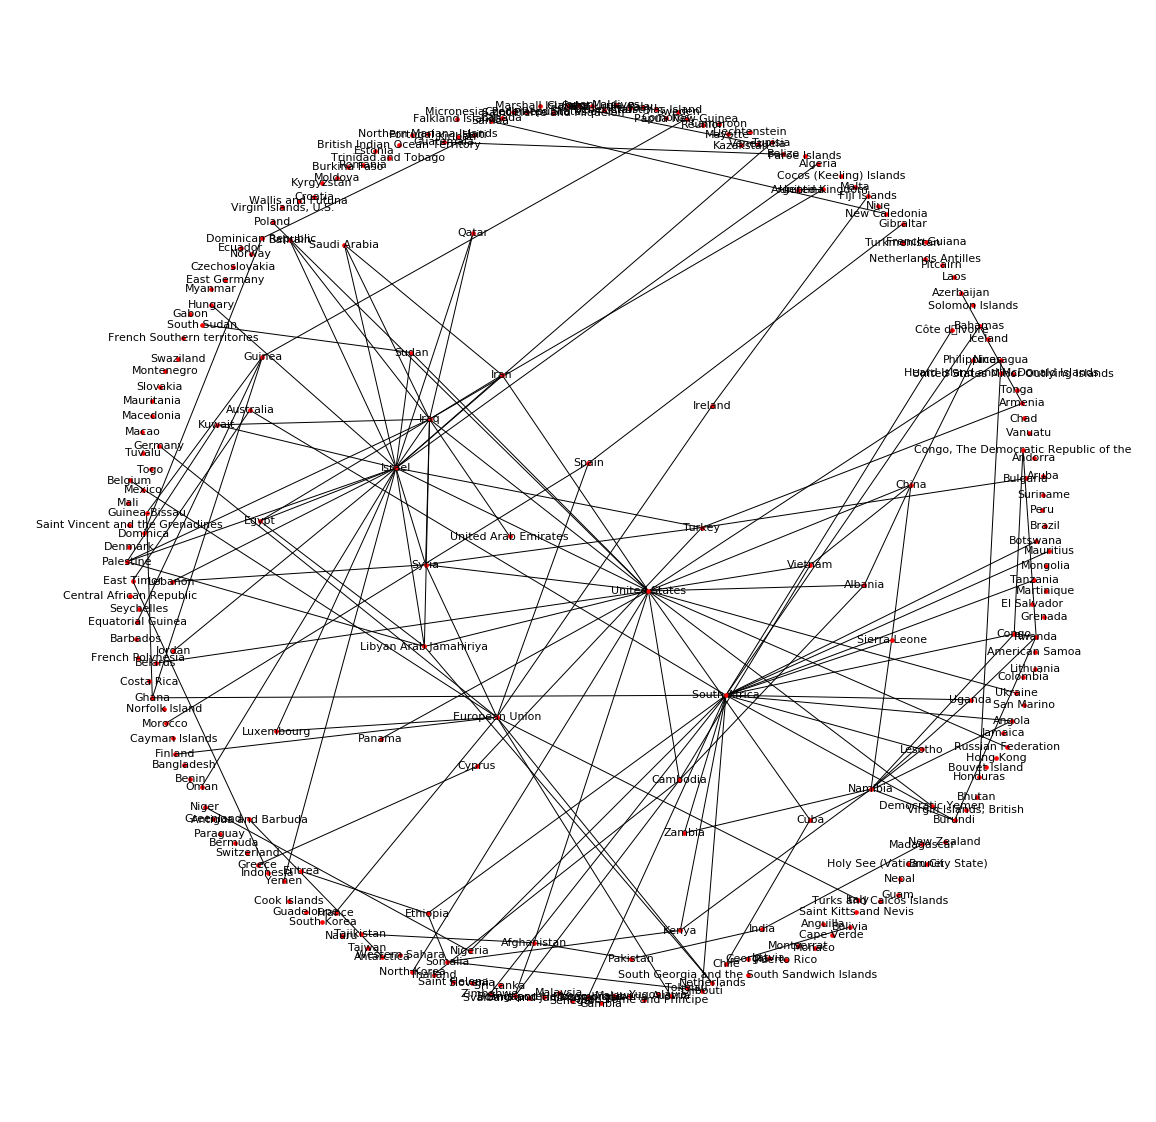

In [5]:
gfig, gax = plt.subplots(figsize=(20,20))
nx.draw(g,nx.spring_layout(g,k=0.4,iterations=35),ax=gax,with_labels=True,font_size=11,node_size=13)